In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('archive\IMDB Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\himan\AppData\Local\Temp\ipykernel_25604\2934561568.py:1: SyntaxWarning: invalid escape sequence '\I'
  df=pd.read_csv('archive\IMDB Dataset.csv')


In [3]:
print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [4]:
if 'sentiment' in df.columns:
    df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
else:
    raise ValueError("Sentiment column is missing in the dataset.")

In [5]:
texts = df['review'].values
labels = df['label'].values

In [6]:
vocab_size = 100000  # Choose vocabulary size
max_length = 100 

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')  # OOV token for words out of vocab
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [8]:
labels = np.array(labels)


In [9]:
embedding_dim = 100

In [10]:
print(f"Padded sequences shape: {padded_sequences.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Vocabulary size: {vocab_size}")


Padded sequences shape: (50000, 100)
Labels shape: (50000,)
Vocabulary size: 100000


In [11]:
from tensorflow.keras.layers import Input
inputs = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
lstm_layer = LSTM(128)(embedding_layer)
dropout_layer = Dropout(0.5)(lstm_layer)
outputs = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 100)       │    10,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,117,377 (38.59 MB)

 Trainable params: 10,117,377 (38.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_size = int(0.8 * len(texts))
X_train = padded_sequences[:train_size]
X_test = padded_sequences[train_size:]
y_train = labels[:train_size]
y_test = labels[train_size:]

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 174s 137ms/step - accuracy: 0.7126 - loss: 0.5373 - val_accuracy: 0.8529 - val_loss: 0.3699
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.9057 - loss: 0.2485 - val_accuracy: 0.8584 - val_loss: 0.3525
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 149ms/step - accuracy: 0.9472 - loss: 0.1520 - val_accuracy: 0.8629 - val_loss: 0.3632
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 151ms/step - accuracy: 0.9736 - loss: 0.0786 - val_accuracy: 0.8526 - val_loss: 0.4557
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 154ms/step - accuracy: 0.9862 - loss: 0.0454 - val_accuracy: 0.8409 - val_loss: 0.4414
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 154ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.8042 - val_loss: 0.5258
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 146ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0.8473 - val_loss: 0.7283
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 177s 142ms/step - ac

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predictions and Classification Report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8446 - loss: 0.9577
Test Accuracy: 84.27%
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85      4993
    Positive       0.86      0.82      0.84      5007

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [15]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

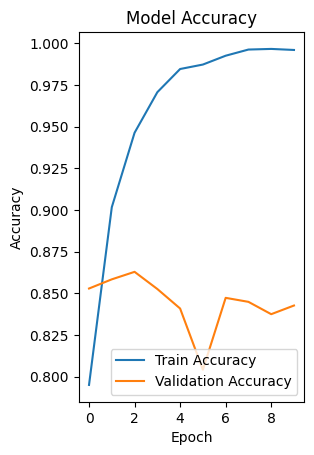

In [16]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

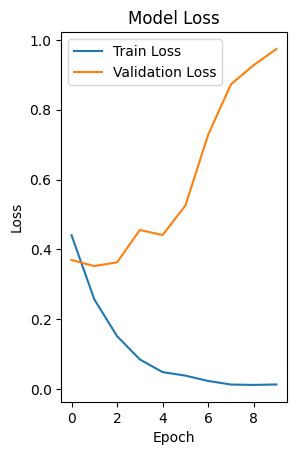

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
import sys
def predict_review(review):
    # Tokenize and pad the input review
    review_seq = tokenizer.texts_to_sequences([review])
    padded_review = pad_sequences(review_seq, maxlen=max_length, padding='post')
    
    # Predict the sentiment
    prediction = model.predict(padded_review)
    
    # Threshold to classify as positive (1) or negative (0)
    if prediction >= 0.5:
        print(f"Review: '{review}' is Positive with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"Review: '{review}' is Negative with a confidence of {1 - prediction[0][0]:.2f}")

In [ ]:
if __name__ == "__main__":
    # Check if a review was provided as an argument
    if len(sys.argv) > 1:
        # Combine arguments into a single review string
        new_review = " ".join(sys.argv[1:])
        print(f"Review entered: {new_review}")
        sentiment = predict_review(new_review)
        print(f"Sentiment: {sentiment}")
    else:
        print("Please provide a movie review as a command line argument")